In [ ]:
### GOAL - deploy model to production thru DJANGO
### Input - User inputs image
### Processing
### Output - Displays masks on image on website

In [12]:
pip freeze

absl-py==0.9.0Note: you may need to restart the kernel to use updated packages.

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astor==0.8.1
astroid==2.3.3
astropy==4.0.1.post1
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==2.0.1
boto==2.49.0
Bottleneck==1.3.2
cachetools==4.0.0
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
click==7.1.1
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.13.0
decorator==4.4.2
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.13.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1.1.1
fsspec==0.7.1
future==0.18.2
gast==0.2.2
gevent==1.4.0
glob2==0.7
goo

In [4]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.draw
import json

# Root directory of the project
ROOT_DIR = os.path.abspath("")
print(ROOT_DIR)
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config, AerialConfig, InferenceConfig
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

D:\Hamzah\MyProjects\Satellite_FeatureExtract\django_deploy\Segment_Deploy\building_det


Using TensorFlow backend.


In [5]:
# check config parameters from iteration file
config = AerialConfig()
inference_config = InferenceConfig()

In [6]:
# improve model and append path here
COCO_MODEL_PATH_TRAINED = 'D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\Our_Implementation\\mask_rcnn_aerial_0030.h5'

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",config=inference_config, model_dir=COCO_MODEL_PATH_TRAINED)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
#model_path = model.find_last()

model_path = COCO_MODEL_PATH_TRAINED

# Load trained weights
print("Loading weights from ", model_path)

model.load_weights(COCO_MODEL_PATH_TRAINED, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])







Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  D:\Hamzah\JobPrep\GPU_Projects\MapDataset\MatterPortGit\Mask_RCNN\Our_Implementation\mask_rcnn_aerial_0030.h5


In [7]:
from mrcnn.utils import AerialDataset

Processing 1 images
image                    shape: (300, 300, 3)         min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



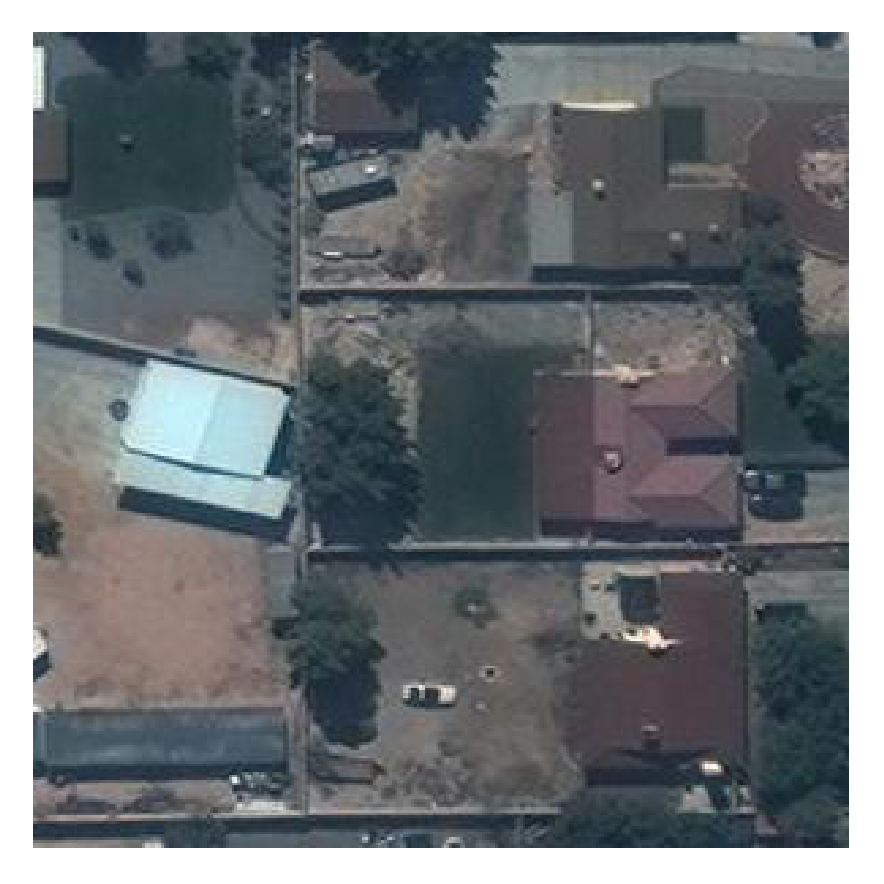

In [8]:
class_names = ['BG', 'building', 'pool']

image_file = "D:\\Hamzah\\JobPrep\\GPU_Projects\\MapDataset\\MatterPortGit\\Mask_RCNN\\Our_Implementation\\aerial\\000000033121.jpg"
image = skimage.io.imread(image_file)
r = model.detect([image], verbose=1)[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])